In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import *
import numpy as np
from matplotlib.cm import viridis

In [2]:
from multi_goal.envs.toy_labyrinth_env import ToyLab
from multi_goal.agents import HERSACAgent
from qfunc_isolines import init_qdist
from grad_descent_render import distance_contours

/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-pack

In [45]:
env = ToyLab()
agent = HERSACAgent(env=env, rank=3)
dist = init_qdist(hersac=agent)

Loaded model /home/tomasruiz/code/thesis/tum-adlr-ss20-02/multi_goal/../all-results/ToyLab-her-sac/ckpts-3/ToyLab-her-sac_10000_steps.zip


5.66672

In [61]:
goal = np.array([-1, -0.5])
dist(goal, goal)

9.562593

<IPython.core.display.Javascript object>


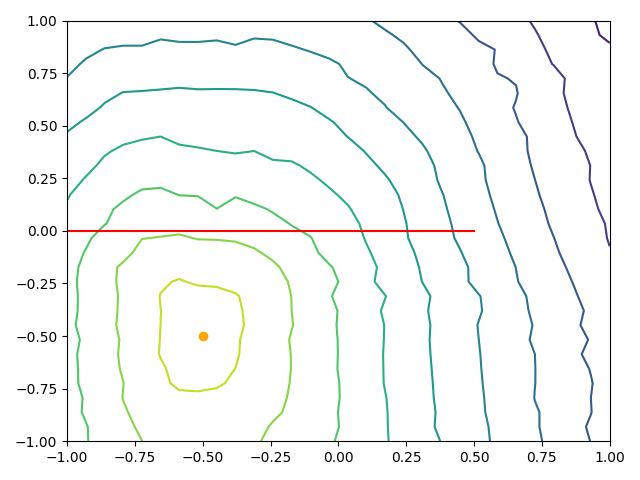

interactive(children=(FloatSlider(value=-0.010000000000000009, description='x1', max=1.0, min=-1.0, step=0.03)…

<function __main__.update(x1=(-1.0, 1.0, 0.03), x2=(-1.0, 1.0, 0.03))>

In [4]:
wall = np.array([[-1, 0], [0.5, 0]])
fig, ax = plt.subplots()
pc = ax.scatter([], [], c="orange")
ax.plot(*wall.T, c="red")
space2d = np.mgrid[-1:1:30j, -1:1:30j]
levels = 10
cmap = viridis
p = []

def update(x1 = (-1.0, 1.0, 0.03), x2 = (-1.0, 1.0, 0.03)):
    goal = np.array([x1, x2])
    pc.set_offsets([x1, x2])
    
    dists = np.array([dist(s, goal) for s in space2d.reshape((2, -1)).T])
    print(dists)
    if len(p) > 0:
        for tp in p[0].collections:
            tp.remove()
    p.clear()
    p.append(ax.contour(*space2d, dists.reshape((30, 30)), levels, cmap=cmap))
    fig.tight_layout()

interact(update)